# Trabajo Práctico 1 : Reservas de Hotel

# Grupo: GPWin - N° 16

Integrantes:

- DIEM, Walter Gabriel

- MAIOLO, Alejandro

- RUIZ, Karen Belén

## Checkpoint 3

Preparación de librerías

In [1]:
%pip install dtreeviz==2.2.2
%pip install joblib
%pip install pydotplus
%pip install graphviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import joblib
import os

from sklearn.linear_model import BayesianRidge
from pandas.plotting import scatter_matrix
from sklearn.preprocessing  import  LabelEncoder
from scipy.spatial.distance import mahalanobis
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.linear_model import LogisticRegressionCV

from xgboost import XGBClassifier
import pydotplus
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

### Prepocesamiento de datos

Todos los modelos que probaremos utilizarán el dataset con el procesamiento que haremos en este apartado. Basándonos en lo extraído del checkpoint 1

Preprocesamos el dataset de train

In [3]:
hotels = pd.read_csv("../datasets/new_hotel_train.csv")
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43392 entries, 0 to 43391
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           43392 non-null  object 
 1   lead_time                       43392 non-null  int64  
 2   arrival_date_year               43392 non-null  int64  
 3   arrival_date_month              43392 non-null  object 
 4   arrival_date_week_number        43392 non-null  int64  
 5   arrival_date_day_of_month       43392 non-null  int64  
 6   stays_in_weekend_nights         43392 non-null  int64  
 7   stays_in_week_nights            43392 non-null  int64  
 8   adults                          43392 non-null  int64  
 9   children                        43392 non-null  float64
 10  babies                          43392 non-null  int64  
 11  meal                            43392 non-null  object 
 12  country                         

Es necesario hacer encoding a las variables categóricas. Utilizamos one-hot encoding para generar variables dummies

Eliminamos la columna de id, ya que sino generaría 1 variable dummy por entrada y no aporta información. Sin embargo,  no eliminamos valores para saber que estos siguen siendo las mismas entradas

In [4]:
hotelsTree = hotels.copy().drop(["id"], axis="columns")

In [5]:
categorics = ["hotel", "arrival_date_month", "meal", "country", "market_segment", "distribution_channel", "reserved_room_type", "assigned_room_type", "customer_type", "deposit_type"]

hotelsTree = pd.get_dummies(hotelsTree, columns=categorics, drop_first=True)
hotelsTree = hotelsTree.sort_index(axis=1, ascending=False)
hotelsTree.head(3)

total_of_special_requests  stays_in_weekend_nights  stays_in_week_nights  \
0                          1                        1                     2   
1                          0                        0                     1   
2                          0                        2                     5   

   reserved_room_type_P  reserved_room_type_H  reserved_room_type_G  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   

   reserved_room_type_F  reserved_room_type_E  reserved_room_type_D  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     0   

   reserved_room_type_C  ...  arrival_date_month_June  \
0                     0  ...                        0   
1                     0  ...                        0   
2                     0  ...                        0   

   arrival_date_month_July  arrival_date_month_January  \
0                        0                           0   
1                        0                           0   
2                        0                           0   

   arrival_date_month_February  arrival_date_month_December  \
0                            0                            0   
1                            0                            0   
2                            0                            1   

   arrival_date_month_August  arrival_date_day_of_month       agent  adults  \
0                          0                          5    9.000000       1   
1                          0                         31  242.547438       2   
2                          0                         12  154.000000       2   

     adr  
0  115.5  
1   42.0  
2   75.0  

[3 rows x 210 columns]

In [6]:
hotelsTree.shape

(43392, 210)

Nos quedamos con el dataset sin el target y el target por separado para hacer el split. Elegimos una proporción 70-30 

In [7]:
hotels_x = hotelsTree.drop(['is_canceled'], axis='columns', inplace=False)
hotels_y = hotelsTree['is_canceled'].copy()

x_train, x_test, y_train, y_test = train_test_split(hotels_x,
                                                    hotels_y,
                                                    test_size=0.3,
                                                    random_state=0)

Inspeccionamos los resultados

In [8]:
x_train.head(2)

total_of_special_requests  stays_in_weekend_nights  \
21465                          0                        1   
15306                          1                        2   

       stays_in_week_nights  reserved_room_type_P  reserved_room_type_H  \
21465                     2                     0                     0   
15306                     3                     0                     0   

       reserved_room_type_G  reserved_room_type_F  reserved_room_type_E  \
21465                     0                     0                     0   
15306                     0                     0                     0   

       reserved_room_type_D  reserved_room_type_C  ...  \
21465                     0                     0  ...   
15306                     0                     0  ...   

       arrival_date_month_June  arrival_date_month_July  \
21465                        0                        0   
15306                        0                        0   

       arrival_date_month_January  arrival_date_month_February  \
21465                           0                            0   
15306                           0                            0   

       arrival_date_month_December  arrival_date_month_August  \
21465                            0                          0   
15306                            0                          1   

       arrival_date_day_of_month      agent  adults    adr  
21465                         15  61.289945       2  170.0  
15306                          7  14.000000       1   75.0  

[2 rows x 209 columns]

In [9]:
x_test.head(2)

total_of_special_requests  stays_in_weekend_nights  \
13394                          0                        0   
38024                          0                        0   

       stays_in_week_nights  reserved_room_type_P  reserved_room_type_H  \
13394                     4                     0                     0   
38024                     1                     0                     0   

       reserved_room_type_G  reserved_room_type_F  reserved_room_type_E  \
13394                     0                     0                     0   
38024                     0                     0                     0   

       reserved_room_type_D  reserved_room_type_C  ...  \
13394                     0                     0  ...   
38024                     0                     0  ...   

       arrival_date_month_June  arrival_date_month_July  \
13394                        0                        0   
38024                        0                        0   

       arrival_date_month_January  arrival_date_month_February  \
13394                           0                            1   
38024                           1                            0   

       arrival_date_month_December  arrival_date_month_August  \
13394                            0                          0   
38024                            0                          0   

       arrival_date_day_of_month      agent  adults   adr  
13394                         15  44.750143       2  78.0  
38024                         18  19.000000       1  75.0  

[2 rows x 209 columns]

In [10]:
y_train.head(2)

21465    1
15306    0
Name: is_canceled, dtype: int64

In [11]:
y_test.head(2)

13394    0
38024    0
Name: is_canceled, dtype: int64

Preprocesamos el dataset de test, para esto hacemos el mismo tratamiento de datos faltantes que hicimos en el checkpoint 1:

In [12]:
hotelsTest = pd.read_csv("../datasets/hotels_test.csv")

Eliminamos la columna company

In [13]:
hotelsTestFiltered = hotelsTest.copy().drop(columns=["company"])

Los nulos que quedan son

In [14]:
nullsFiltered = hotelsTestFiltered.get(["agent", "country"]).isnull()

nullsStats = pd.DataFrame({"Cantidad de Nulos": nullsFiltered.sum(), "Porcentaje de nulos": round(nullsFiltered.mean() * 100, 2)})
nullsStats

Cantidad de Nulos  Porcentaje de nulos
agent                 3363                12.67
country                 95                 0.36

Hacemos label encoding para luego imputar estos datos nulos

In [15]:
varsToEncode = ["hotel", "arrival_date_month", "meal", "country", "market_segment", "distribution_channel","reserved_room_type", "assigned_room_type", "deposit_type", "customer_type", "id"]
labelEncoders = {}

for varToEncode in varsToEncode:
    encoder = LabelEncoder()
    hotelsTestFiltered[varToEncode] = encoder.fit_transform(hotelsTestFiltered[varToEncode])
    labelEncoders[varToEncode] = encoder

In [16]:
imputer = IterativeImputer(estimator=BayesianRidge(), missing_values=np.nan, max_iter=10, verbose=0, random_state=0)

originalDtypes = hotelsTestFiltered.dtypes
imputedAndFilteredTest = hotelsTestFiltered.copy()

imputedAndFilteredTest = pd.DataFrame(imputer.fit_transform(imputedAndFilteredTest), columns=imputedAndFilteredTest.columns)

In [17]:
imputedAndFilteredTest["agent"] = imputedAndFilteredTest["agent"].clip(lower=hotelsTestFiltered.agent.min(), upper=hotelsTestFiltered.agent.max())
imputedAndFilteredTest["country"] = imputedAndFilteredTest["country"].clip(lower=hotelsTestFiltered.country.min(), upper=hotelsTestFiltered.country.max())
imputedAndFilteredTest = imputedAndFilteredTest.astype(originalDtypes)

Decodeamos

In [18]:
for varToEncode in varsToEncode:
    encoder = labelEncoders.get(varToEncode)
    imputedAndFilteredTest[varToEncode] = encoder.inverse_transform(imputedAndFilteredTest[varToEncode])

In [19]:
imputedAndFilteredTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26535 entries, 0 to 26534
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           26535 non-null  object 
 1   lead_time                       26535 non-null  int64  
 2   arrival_date_year               26535 non-null  int64  
 3   arrival_date_month              26535 non-null  object 
 4   arrival_date_week_number        26535 non-null  int64  
 5   arrival_date_day_of_month       26535 non-null  int64  
 6   stays_in_weekend_nights         26535 non-null  int64  
 7   stays_in_week_nights            26535 non-null  int64  
 8   adults                          26535 non-null  int64  
 9   children                        26535 non-null  float64
 10  babies                          26535 non-null  int64  
 11  meal                            26535 non-null  object 
 12  country                         

Ahora, igual que a los datos de train más arriba, hacemos one-hot encoding a los datos de test

Guardamos las ids para posterior match entre resultado y id

In [20]:
hotelsTestIds = imputedAndFilteredTest["id"]

In [21]:
imputedAndFilteredTestEncoded = imputedAndFilteredTest.copy()
imputedAndFilteredTestEncoded.drop(["id"], axis="columns", inplace=True)
imputedAndFilteredTestEncoded = pd.get_dummies(imputedAndFilteredTestEncoded, columns=categorics, drop_first=True)

imputedAndFilteredTestEncoded.head(3)

lead_time  arrival_date_year  arrival_date_week_number  \
0        277               2016                        46   
1        286               2016                        20   
2          0               2016                        35   

   arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  \
0                          7                        1                     2   
1                         11                        0                     4   
2                         23                        0                     1   

   adults  children  babies  is_repeated_guest  ...  assigned_room_type_G  \
0       2       0.0       0                  0  ...                     0   
1       2       0.0       0                  0  ...                     0   
2       3       0.0       0                  0  ...                     0   

   assigned_room_type_H  assigned_room_type_I  assigned_room_type_K  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   

   assigned_room_type_P  customer_type_Group  customer_type_Transient  \
0                     0                    0                        1   
1                     0                    0                        0   
2                     0                    0                        1   

   customer_type_Transient-Party  deposit_type_Non Refund  \
0                              0                        1   
1                              1                        0   
2                              0                        0   

   deposit_type_Refundable  
0                        0  
1                        0  
2                        0  

[3 rows x 201 columns]

In [22]:
imputedAndFilteredTestEncoded.shape

(26535, 201)

Comparamos el shape con el dataset de train, ya que el modelo "entenderá" la estructura con la que fue entrenado

In [23]:
hotelsTree.shape

(43392, 210)

Observamos que hay una discrepancia, así que obtenemos las columnas que están presentes de manera única en cada dataset

In [24]:
hotelsTreeWithoutTarget = hotelsTree.copy()
hotelsTreeWithoutTarget.drop(["is_canceled"], axis="columns", inplace=True)
hotelsTreeColumns = set(hotelsTreeWithoutTarget.columns)
imputedAndFilteredTestEncodedColumns = set(imputedAndFilteredTestEncoded.columns)

columnsOnlyInHotelsTree = np.array(list(hotelsTreeColumns - imputedAndFilteredTestEncodedColumns)).tolist()

columnsOnlyInImputedAndFiltered = np.array(list(imputedAndFilteredTestEncodedColumns - hotelsTreeColumns)).tolist()

print("Columnas presentes solamente en hotelsTree:", columnsOnlyInHotelsTree)
print("Columnas presentes solamente en imputedAndFilteredTestEncoded:", columnsOnlyInImputedAndFiltered)

Columnas presentes solamente en hotelsTree: ['country_TGO', 'country_ZMB', 'country_HND', 'country_COM', 'country_ETH', 'country_PAN', 'country_UMI', 'country_BEN', 'country_MYT', 'country_MUS', 'country_CIV', 'country_FRO', 'country_VGB', 'country_MDG', 'country_ARM', 'country_AZE', 'country_SDN', 'country_KEN', 'country_MNE', 'country_SYC', 'country_SYR', 'country_FJI', 'country_NAM']
Columnas presentes solamente en imputedAndFilteredTestEncoded: ['country_DMA', 'country_TMP', 'country_STP', 'country_KHM', 'country_ATF', 'country_MLI', 'country_UZB', 'reserved_room_type_L', 'country_ASM', 'country_SLV', 'country_DJI', 'country_NIC', 'country_SMR', 'country_GHA', 'country_BFA']


Eliminamos las columnas presentes sólo en los datos de test que no fueron vistos durante el entrenamiento

In [25]:
imputedAndFilteredTestEncoded.drop(columnsOnlyInImputedAndFiltered, axis="columns", inplace=True)
imputedAndFilteredTestEncoded.shape

(26535, 186)

Agregamos las columnas faltantes a los datos de test que sí están en los datos de train, ponemos sus valores en 0

In [26]:
for column in columnsOnlyInHotelsTree:
    imputedAndFilteredTestEncoded[column] = 0

imputedAndFilteredTestEncoded = imputedAndFilteredTestEncoded.sort_index(axis=1, ascending=False)
imputedAndFilteredTestEncoded.shape

(26535, 209)

In [27]:
imputedAndFilteredTestEncoded.head(2)

total_of_special_requests  stays_in_weekend_nights  stays_in_week_nights  \
0                          0                        1                     2   
1                          0                        0                     4   

   reserved_room_type_P  reserved_room_type_H  reserved_room_type_G  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_F  reserved_room_type_E  reserved_room_type_D  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_C  ...  arrival_date_month_June  \
0                     0  ...                        0   
1                     0  ...                        0   

   arrival_date_month_July  arrival_date_month_January  \
0                        0                           0   
1                        0                           0   

   arrival_date_month_February  arrival_date_month_December  \
0                            0                            0   
1                            0                            0   

   arrival_date_month_August  arrival_date_day_of_month      agent  adults  \
0                          0                          7  36.162958       2   
1                          0                         11  30.000000       2   

     adr  
0  100.0  
1  101.0  

[2 rows x 209 columns]

In [28]:
hotelsTreeWithoutTarget.shape

(43392, 209)

### Modelo SVM

#### Normalización

Tenemos ya el dataset de train y el final listos, con el de train spliteado en train-test con relación 70/30

Hacemos una normalización de los datos con un escalador Standard para alinear mejor los datos con el funcionamiento de un SVM

In [29]:
standardScaler = StandardScaler()

x_train = standardScaler.fit_transform(x_train)
x_test = standardScaler.transform(x_test)

Lo mismo hacemos con el dataset de a predecir

In [30]:
testDataScaled = standardScaler.transform(imputedAndFilteredTestEncoded)

#### SVM kernel polinómico

Probamos utilizar un SVM con kernel polinómico de grado 3, coeficiente de regularización en 1, gamma en 1 también y coef0 en 0.1:

`SVC(kernel='poly', C=1, degree=3, gamma=1, coef0=0.1)`

El entrenamiento del modelo tardó 21.5 horas así que ahora lo cargo de la serialización que guardamos al momento de dejar el notebook corriendo

In [31]:
runNumber = 23

#svm = SVC(kernel='poly', C=1, degree=3, gamma=1, coef0=0.1)
#svm.fit(x_train, y_train)

svm = joblib.load("./svm_model_23.joblib")
svm = svm.get("model")
svm.random_state = 0
svm.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.1,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 1,
 'kernel': 'poly',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [32]:
y_pred = svm.predict(x_test)

In [33]:
hotelsTreeWithoutTarget.shape

(43392, 209)

Imprimimos la matriz de confusión

F1-Score: 0.784224841341795


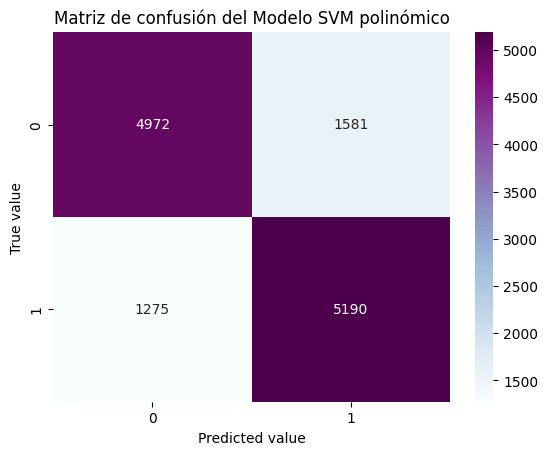

In [34]:
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary')))

confussionMatrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confussionMatrix,cmap='BuPu', annot=True, fmt='g')
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.title("Matriz de confusión del Modelo SVM polinómico")
plt.show()

Mostramos las distintas métricas

In [35]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {str(accuracy)}")
print(f"Recall: {str(recall)}")
print(f"Precision: {str(precision)}")
print(f"f1 score: {str(f1)}")

Accuracy: 0.7806114610539253
Recall: 0.802784222737819
Precision: 0.76650420912716
f1 score: 0.784224841341795


Realizamos las predicciones de los datos que vamos a submitear a kaggle

In [36]:
y_pred = svm.predict(testDataScaled)

Agrupamos en el dataframe el id que guardamos antes y los valores predichos

In [37]:
imputedAndFilteredTestEncoded["id"] = hotelsTestIds
imputedAndFilteredTestEncoded["is_canceled"] = y_pred

imputedAndFilteredTestEncoded.head(2)

total_of_special_requests  stays_in_weekend_nights  stays_in_week_nights  \
0                          0                        1                     2   
1                          0                        0                     4   

   reserved_room_type_P  reserved_room_type_H  reserved_room_type_G  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_F  reserved_room_type_E  reserved_room_type_D  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_C  ...  arrival_date_month_January  \
0                     0  ...                           0   
1                     0  ...                           0   

   arrival_date_month_February  arrival_date_month_December  \
0                            0                            0   
1                            0                            0   

   arrival_date_month_August  arrival_date_day_of_month      agent  adults  \
0                          0                          7  36.162958       2   
1                          0                         11  30.000000       2   

     adr                                    id  is_canceled  
0  100.0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1  
1  101.0  aba9aac2-4495-4645-a60e-90328713c999            1  

[2 rows x 211 columns]

Para exportar a Kaggle hacemos lo siguiente

In [38]:
exportResult = imputedAndFilteredTestEncoded.get(["id", "is_canceled"])
exportResult.shape

(26535, 2)

In [39]:
exportResult.head(2)

id  is_canceled
0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1
1  aba9aac2-4495-4645-a60e-90328713c999            1

El `runNumber` es sólo un número que ponemos para no pisar los submits

In [40]:
exportResult.to_csv(f"submit_{runNumber}_grupo16_gpwin_svm.csv", index=False)

#### SVM kernel radial (RBF)

##### Parámetros default

Probamos utilizar un SVM con kernel radial (Radial Basis Function - RBF) que es el que viene por defecto en el modelo clasificador SVC y los hiperparámetros por defecto

In [41]:
runNumber = 24

svm = SVC(kernel='rbf', C=1, gamma="auto", random_state=0)
svm.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 0,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

El entrenamiento tardó 1.5 minutos, muchísimo menos que el kernel polinómico

In [191]:
svm.fit(x_train, y_train)

SVC(C=1, gamma='auto', random_state=0)

In [43]:
y_pred = svm.predict(x_test)

Imprimimos la matriz de confusión

F1-Score: 0.8069935385784872


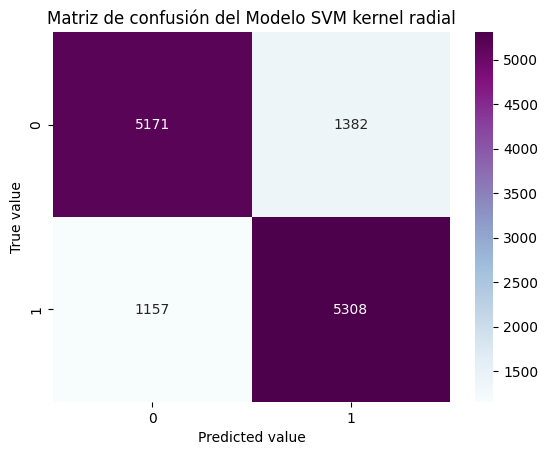

In [44]:
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary')))

confussionMatrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confussionMatrix,cmap='BuPu', annot=True, fmt='g')
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.title("Matriz de confusión del Modelo SVM kernel radial")
plt.show()

Mostramos las distintas métricas

In [45]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {str(accuracy)}")
print(f"Recall: {str(recall)}")
print(f"Precision: {str(precision)}")
print(f"f1 score: {str(f1)}")

Accuracy: 0.8049623598094946
Recall: 0.8210363495746327
Precision: 0.793423019431988
f1 score: 0.8069935385784872


Realizamos las predicciones de los datos que vamos a submitear a kaggle

In [47]:
y_pred = svm.predict(testDataScaled)

Agrupamos en el dataframe el id que guardamos antes y los valores predichos

In [49]:
imputedAndFilteredTestEncoded["id"] = hotelsTestIds
imputedAndFilteredTestEncoded["is_canceled"] = y_pred

imputedAndFilteredTestEncoded.head(2)

total_of_special_requests  stays_in_weekend_nights  stays_in_week_nights  \
0                          0                        1                     2   
1                          0                        0                     4   

   reserved_room_type_P  reserved_room_type_H  reserved_room_type_G  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_F  reserved_room_type_E  reserved_room_type_D  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_C  ...  arrival_date_month_January  \
0                     0  ...                           0   
1                     0  ...                           0   

   arrival_date_month_February  arrival_date_month_December  \
0                            0                            0   
1                            0                            0   

   arrival_date_month_August  arrival_date_day_of_month      agent  adults  \
0                          0                          7  36.162958       2   
1                          0                         11  30.000000       2   

     adr                                    id  is_canceled  
0  100.0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1  
1  101.0  aba9aac2-4495-4645-a60e-90328713c999            0  

[2 rows x 211 columns]

Para exportar a Kaggle hacemos lo siguiente

In [50]:
exportResult = imputedAndFilteredTestEncoded.get(["id", "is_canceled"])
exportResult.shape

(26535, 2)

In [51]:
exportResult.head(2)

id  is_canceled
0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1
1  aba9aac2-4495-4645-a60e-90328713c999            0

El `runNumber` es sólo un número que ponemos para no pisar los submits

In [52]:
exportResult.to_csv(f"submit_{runNumber}_grupo16_gpwin_svm.csv", index=False)

Guardamos una serialización del modelo

In [53]:
filename = f'./svm_model_{runNumber}.joblib'
modelInfo = {'model': svm}

joblib.dump(modelInfo, filename)

['./svm_model_24.joblib']

##### Optimización de hiperparámetros

Realizamos una optimización de hiperparámetros mediante una búsqueda total del conjunto de combinaciones, teniendo en cuenta una lista de 10 valores para el parámetro de regularización C y 10 para gamma. El proceso lo realizamos optimizando la métrica F1 en un split de 5 folds del conjunto de train.

In [202]:
runNumber = 25

parametersGrid = {
                    'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 3, 5, 6, 10],
                    'gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 1.5, 2, 5, 10],
                 }

folds = 5
kFoldCV = StratifiedKFold(n_splits = folds)
starterSVM = SVC(kernel='rbf')
scorerF1 = make_scorer(f1_score)

gridSearchCV = GridSearchCV(estimator = starterSVM,
                                    param_grid = parametersGrid,
                                    scoring = scorerF1,
                                    cv = kFoldCV,
                                    n_jobs = -1)

gridSearchCV.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1, 2, 3, 5, 6, 10],
                         'gamma': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 1.5, 2, 5,
                                   10]},
             scoring=make_scorer(f1_score))

El entrenamiento tardó 14.5 horas. Nos quedamos con el SVM con mejor set de hiperparámetros

In [203]:
bestSvm = gridSearchCV.best_estimator_

Obtenemos el score interno que sacó el mejor conjunto de hiperparámetros y el índice de splitting

In [56]:
bestScore = gridSearchCV.best_score_
indexOfBestFoldSplit = gridSearchCV.best_index_

print("Mejor F1 Score:", bestScore)
print("Fold Split Index para el mejor modelo:", indexOfBestFoldSplit)

Mejor F1 Score: 0.8236312236864766
Fold Split Index para el mejor modelo: 81


Mostramos y guardamos en un archivo de texto los hiperparámetros, junto con el score

In [65]:
hyperparameters = bestSvm.get_params()

print("Mejor conjunto de hiperparámetros:\n")
for param, value in hyperparameters.items():
    print(f"{param}: {value}")

Mejor conjunto de hiperparámetros:

C: 6
break_ties: False
cache_size: 200
class_weight: None
coef0: 0.0
decision_function_shape: ovr
degree: 3
gamma: 0.01
kernel: rbf
max_iter: -1
probability: False
random_state: 0
shrinking: True
tol: 0.001
verbose: False


In [206]:
filename = f'./best_svm_hyperparameters{runNumber}.txt'

with open(filename, 'w') as file:
    file.write("Mejor conjunto de hiperparámetros:\n")
    for param, value in hyperparameters.items():
        file.write(f"{param}: {value}\n")

    file.write(f"\nBest F1 Score: {bestScore}")
    file.write(f"\nFold Split Index for Best Set: {indexOfBestFoldSplit}")

print(f"Mejor conjunto de hiperparámetros guardado en: '{filename}'")

Mejor conjunto de hiperparámetros guardado en: './best_svm_hyperparameters25.txt'


Lo fiteamos al conjunto de datos total de train

In [31]:
bestSvm = SVC(kernel='rbf', C=6, gamma=0.01, coef0=0, random_state=0)

In [32]:
bestSvm.fit(x_train, y_train)

SVC(C=6, coef0=0, gamma=0.01, random_state=0)

In [33]:
y_pred = bestSvm.predict(x_test)

Imprimimos la matriz de confusión

F1-Score: 0.8250284414106939


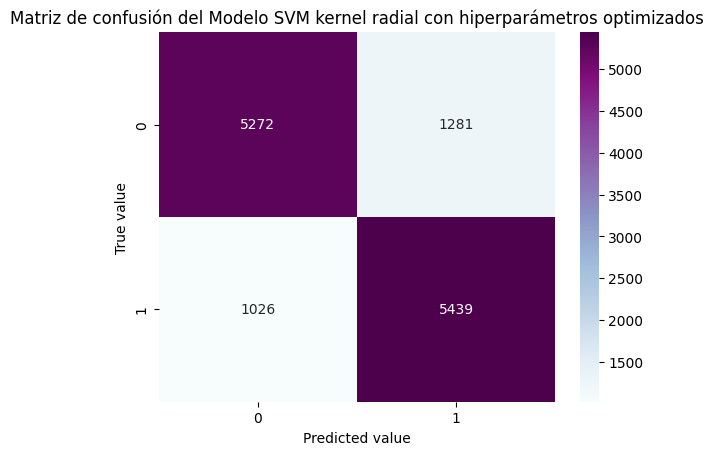

In [34]:
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary')))

confussionMatrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confussionMatrix,cmap='BuPu', annot=True, fmt='g')
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.title("Matriz de confusión del Modelo SVM kernel radial con hiperparámetros optimizados")
plt.show()

Mostramos las distintas métricas

In [35]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {str(accuracy)}")
print(f"Recall: {str(recall)}")
print(f"Precision: {str(precision)}")
print(f"f1 score: {str(f1)}")

Accuracy: 0.8227838377630973
Recall: 0.8412993039443155
Precision: 0.809375
f1 score: 0.8250284414106939


Realizamos las predicciones de los datos que vamos a submitear a kaggle

In [36]:
y_pred = bestSvm.predict(testDataScaled)

Agrupamos en el dataframe el id que guardamos antes y los valores predichos

In [37]:
imputedAndFilteredTestEncoded["id"] = hotelsTestIds
imputedAndFilteredTestEncoded["is_canceled"] = y_pred

imputedAndFilteredTestEncoded.head(2)

total_of_special_requests  stays_in_weekend_nights  stays_in_week_nights  \
0                          0                        1                     2   
1                          0                        0                     4   

   reserved_room_type_P  reserved_room_type_H  reserved_room_type_G  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_F  reserved_room_type_E  reserved_room_type_D  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_C  ...  arrival_date_month_January  \
0                     0  ...                           0   
1                     0  ...                           0   

   arrival_date_month_February  arrival_date_month_December  \
0                            0                            0   
1                            0                            0   

   arrival_date_month_August  arrival_date_day_of_month      agent  adults  \
0                          0                          7  36.162958       2   
1                          0                         11  30.000000       2   

     adr                                    id  is_canceled  
0  100.0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1  
1  101.0  aba9aac2-4495-4645-a60e-90328713c999            0  

[2 rows x 211 columns]

Para exportar a Kaggle hacemos lo siguiente

In [38]:
exportResult = imputedAndFilteredTestEncoded.get(["id", "is_canceled"])
exportResult.shape

(26535, 2)

In [39]:
exportResult.head(2)

id  is_canceled
0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1
1  aba9aac2-4495-4645-a60e-90328713c999            0

El `runNumber` es sólo un número que ponemos para no pisar los submits

In [40]:
exportResult.to_csv(f"submit_{runNumber}_grupo16_gpwin_svm.csv", index=False)

Guardamos una serialización del modelo

In [41]:
filename = f'./svm_model_{runNumber}.joblib'
modelInfo = {'model': bestSvm}

joblib.dump(modelInfo, filename)

['./svm_model_25.joblib']

### Modelo XGBoost

#### Parámetros default

Probamos utilizar un ensamble XGBoost con los hiperparámetros por defecto. Hacemos el spliteo de data de nuevo para tener los datos no normalizados

In [41]:
hotels_x = hotelsTree.drop(['is_canceled'], axis='columns', inplace=False)
hotels_y = hotelsTree['is_canceled'].copy()

x_train, x_test, y_train, y_test = train_test_split(hotels_x,
                                                    hotels_y,
                                                    test_size=0.3,
                                                    random_state=0)

In [79]:
runNumber = 26

xgboost = XGBClassifier(random_state=0)
xgboost.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 0,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [80]:
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [81]:
y_pred = xgboost.predict(x_test)

Imprimimos la matriz de confusión

F1-Score: 0.8559726962457337


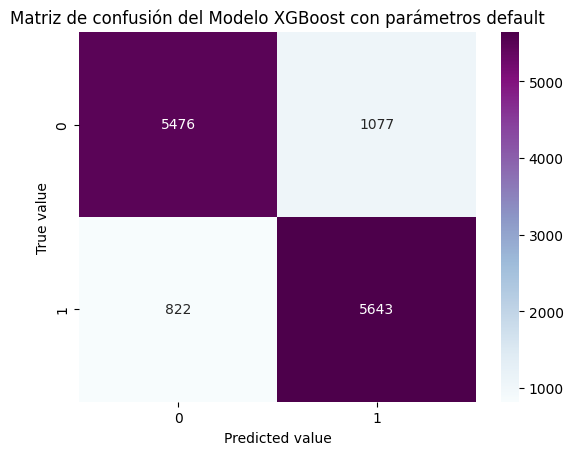

In [82]:
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary')))

confussionMatrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confussionMatrix,cmap='BuPu', annot=True, fmt='g')
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.title("Matriz de confusión del Modelo XGBoost con parámetros default")
plt.show()

Mostramos las distintas métricas

In [83]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {str(accuracy)}")
print(f"Recall: {str(recall)}")
print(f"Precision: {str(precision)}")
print(f"f1 score: {str(f1)}")

Accuracy: 0.8541250576125365
Recall: 0.8728538283062645
Precision: 0.8397321428571428
f1 score: 0.8559726962457337


Realizamos las predicciones de los datos que vamos a submitear a kaggle

In [85]:
imputedAndFilteredTestEncoded = imputedAndFilteredTestEncoded.drop(["id", "is_canceled"], axis="columns")

y_pred = xgboost.predict(imputedAndFilteredTestEncoded)

Agrupamos en el dataframe el id que guardamos antes y los valores predichos

In [86]:
imputedAndFilteredTestEncoded["id"] = hotelsTestIds
imputedAndFilteredTestEncoded["is_canceled"] = y_pred

imputedAndFilteredTestEncoded.head(2)

total_of_special_requests  stays_in_weekend_nights  stays_in_week_nights  \
0                          0                        1                     2   
1                          0                        0                     4   

   reserved_room_type_P  reserved_room_type_H  reserved_room_type_G  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_F  reserved_room_type_E  reserved_room_type_D  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_C  ...  arrival_date_month_January  \
0                     0  ...                           0   
1                     0  ...                           0   

   arrival_date_month_February  arrival_date_month_December  \
0                            0                            0   
1                            0                            0   

   arrival_date_month_August  arrival_date_day_of_month      agent  adults  \
0                          0                          7  36.162958       2   
1                          0                         11  30.000000       2   

     adr                                    id  is_canceled  
0  100.0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1  
1  101.0  aba9aac2-4495-4645-a60e-90328713c999            1  

[2 rows x 211 columns]

Para exportar a Kaggle hacemos lo siguiente

In [87]:
exportResult = imputedAndFilteredTestEncoded.get(["id", "is_canceled"])
exportResult.shape

(26535, 2)

In [88]:
exportResult.head(2)

id  is_canceled
0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1
1  aba9aac2-4495-4645-a60e-90328713c999            1

El `runNumber` es sólo un número que ponemos para no pisar los submits

In [89]:
exportResult.to_csv(f"submit_{runNumber}_grupo16_gpwin_xgboost.csv", index=False)

Guardamos una serialización del modelo

In [90]:
filename = f'./xgboost_model_{runNumber}.joblib'
modelInfo = {'model': xgboost}

joblib.dump(modelInfo, filename)

['./xgboost_model_26.joblib']

#### Optimización de hiperparámetros

Realizamos una optimización de hiperparámetros mediante una búsqueda aleatoria del conjunto de combinaciones, teniendo en cuenta un conjunto de valores de eta (learning_rate), la profundidad máxima de cada árbol (max_depth), el minimum loss para partir una hoja (min_split_loss), el parámetro de regularización L1 alpha y el parámetro de regularización L2 lambda. El proceso lo realizamos optimizando la métrica F1 en un split de 5 folds del conjunto de train.

In [94]:
runNumber = 28

parametersGrid =  {
                     'eta': [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4],
                     'max_depth': range(1, 200, 1),
                     'min_split_loss': [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5],
                     'alpha': [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5],
                     'lambda': [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5]
                  }

n = 1000
folds = 5
kFoldCV = StratifiedKFold(n_splits = folds)
starterXgboost = XGBClassifier(random_state=0, device="gpu")
scorerF1 = make_scorer(f1_score)

randomSearchCV = RandomizedSearchCV(estimator = starterXgboost,
                                    param_distributions = parametersGrid,
                                    scoring = scorerF1,
                                    cv = kFoldCV,
                                    n_iter= n,
                                    n_jobs = -1,
                                    verbose=2)

randomSearchCV.fit(x_train,y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device='gpu',
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           impo...
                                           num_parallel_tree=None,
                                           random_state=0, ...),
                   n_iter=1000, n_jobs=-1,
                   param_distributions={'alpha': [0, 0.05, 0.1, 0.15, 0.2, 0.25,
                                                  0.3, 0.35, 0.4, 0.5],
                                        'eta': [0.01, 0.05, 0.1, 0.15, 0.2,
                                                0.25, 0.3, 0.35, 0.4],
                                        'lambda': [0, 0.05, 0.1, 0.15, 0.2,
                                                   0.25, 0.3, 0.35, 0.4, 0.5],
                                        'max_depth': range(1, 200),
                                        'min_split_loss': [0, 0.05, 0.1, 0.15,
                                                           0.2, 0.25, 0.3, 0.35,
                                                           0.4, 0.5]},
                   scoring=make_scorer(f1_score), verbose=2)

La búsqueda de hiperparámetros en estas 1000 combinaciones tardó 4.5 horas. Nos quedamos con el mejor set de hiperparámetros

In [95]:
bestXgboost = randomSearchCV.best_estimator_

Obtenemos el score interno que sacó el mejor conjunto de hiperparámetros y el índice de splitting

In [96]:
bestScore = randomSearchCV.best_score_
indexOfBestFoldSplit = randomSearchCV.best_index_

print("Mejor F1 Score:", bestScore)
print("Fold Split Index para el mejor modelo:", indexOfBestFoldSplit)

Mejor F1 Score: 0.8674219593715197
Fold Split Index para el mejor modelo: 687


Mostramos los hiperparámetros

In [92]:
hyperparameters = bestXgboost.get_params()

print("Mejor conjunto de hiperparámetros:\n")
for param, value in hyperparameters.items():
    if value != None:
        print(f"{param}: {value}")

Mejor conjunto de hiperparámetros:

objective: binary:logistic
device: gpu
enable_categorical: False
max_depth: 11
missing: nan
random_state: 0
min_split_loss: 0.05
lambda: 0.3
eta: 0.1
alpha: 0.3


Lo fiteamos al conjunto de datos total de train

In [93]:
bestXgboost.fit(x_train, y_train)

XGBClassifier(alpha=0.3, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None, lambda=0.3,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=11,
              max_leaves=None, min_child_weight=None, min_split_loss=0.05,
              missing=nan, monotone_constraints=None, multi_strategy=None, ...)

In [94]:
y_pred = bestXgboost.predict(x_test)

Imprimimos la matriz de confusión

F1-Score: 0.8621054221416703


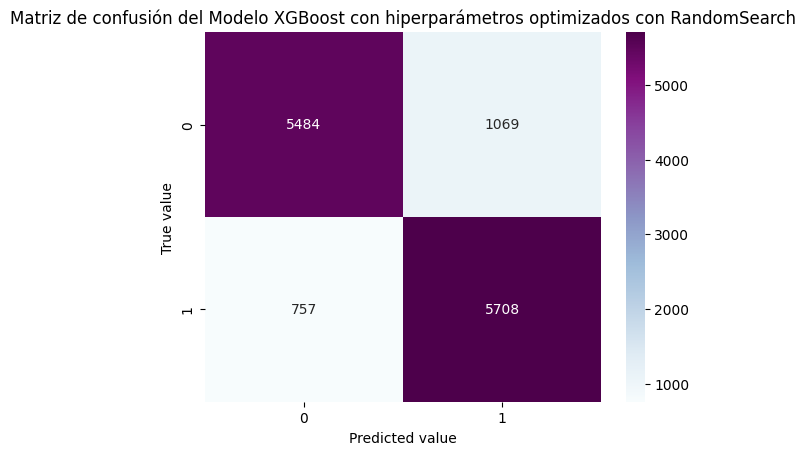

In [95]:
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary')))

confussionMatrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confussionMatrix,cmap='BuPu', annot=True, fmt='g')
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.title("Matriz de confusión del Modelo XGBoost con hiperparámetros optimizados con RandomSearch")
plt.show()

Mostramos las distintas métricas

In [96]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {str(accuracy)}")
print(f"Recall: {str(recall)}")
print(f"Precision: {str(precision)}")
print(f"f1 score: {str(f1)}")

Accuracy: 0.859732677830696
Recall: 0.8829079659706109
Precision: 0.8422605872805076
f1 score: 0.8621054221416703


In [99]:
filename = f'./best_xgboost_hyperparameters{runNumber}.txt'

with open(filename, 'w') as file:
    file.write("Mejor conjunto de hiperparámetros:\n")
    for param, value in hyperparameters.items():
        if value != None:
            file.write(f"{param}: {value}\n")

    file.write(f"\nBest F1 Score: {bestScore}")
    file.write(f"\nFold Split Index for Best Set: {indexOfBestFoldSplit}")

print(f"Mejor conjunto de hiperparámetros guardado en: '{filename}'")

Mejor conjunto de hiperparámetros guardado en: './best_xgboost_hyperparameters28.txt'


Realizamos las predicciones de los datos que vamos a submitear a kaggle

In [100]:
imputedAndFilteredTestEncoded = imputedAndFilteredTestEncoded.drop(["id", "is_canceled"], axis="columns")

y_pred = bestXgboost.predict(imputedAndFilteredTestEncoded)

Agrupamos en el dataframe el id que guardamos antes y los valores predichos

In [101]:
imputedAndFilteredTestEncoded["id"] = hotelsTestIds
imputedAndFilteredTestEncoded["is_canceled"] = y_pred

imputedAndFilteredTestEncoded.head(2)

total_of_special_requests  stays_in_weekend_nights  stays_in_week_nights  \
0                          0                        1                     2   
1                          0                        0                     4   

   reserved_room_type_P  reserved_room_type_H  reserved_room_type_G  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_F  reserved_room_type_E  reserved_room_type_D  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_C  ...  arrival_date_month_January  \
0                     0  ...                           0   
1                     0  ...                           0   

   arrival_date_month_February  arrival_date_month_December  \
0                            0                            0   
1                            0                            0   

   arrival_date_month_August  arrival_date_day_of_month      agent  adults  \
0                          0                          7  36.162958       2   
1                          0                         11  30.000000       2   

     adr                                    id  is_canceled  
0  100.0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1  
1  101.0  aba9aac2-4495-4645-a60e-90328713c999            1  

[2 rows x 211 columns]

Para exportar a Kaggle hacemos lo siguiente

In [102]:
exportResult = imputedAndFilteredTestEncoded.get(["id", "is_canceled"])
exportResult.shape

(26535, 2)

In [103]:
exportResult.head(2)

id  is_canceled
0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1
1  aba9aac2-4495-4645-a60e-90328713c999            1

El `runNumber` es sólo un número que ponemos para no pisar los submits

In [104]:
exportResult.to_csv(f"submit_{runNumber}_grupo16_gpwin_xgboost.csv", index=False)

Guardamos una serialización del modelo

In [105]:
filename = f'./xgboost_model_{runNumber}.joblib'
modelInfo = {'model': bestXgboost}

joblib.dump(modelInfo, filename)

['./xgboost_model_28.joblib']

#### Optimización de hiperparámetros bayesiana

Realizamos una optimización de hiperparámetros mediante una optimización bayesiana de hiperparámetros. El proceso lo realizamos optimizando la métrica F1 en un split de 5 folds del conjunto de train.

La optimización bayesiana es un enfoque efectivo para optimizar hiperparámetros, ya que a diferencia de los métodos de grid search y random search, aprovecha los resultados de evaluaciones previas para tomar decisiones más inteligentes sobre el siguiente conjunto de hiperparámetros a explorar. Trata la búsqueda de hiperparámetros óptimos como un problema de optimización, guiado por un modelo probabilístico que estima la probabilidad de lograr un resultado deseado con una combinación particular de hiperparámetros. Este enfoque reduce la cantidad de evaluaciones de la función objetivo necesarias para encontrar una buena solución, lo que lo hace especialmente valioso cuando la función objetivo es desconocida, que suele ser el caso. Varios modelos probabilísticos, como los procesos gaussianos, la regresión de random forests y los estimadores de Parzen estructurados en árboles (tree-structured Parzen estimators -TPE), sirven como modelos sustitutos para acelerar el proceso de optimización.

Usaremos la librería optuna que automatiza y agiliza el proceso de ajuste de hiperparámetros, esta es la que utiliza técnicas de optimización bayesiana mencionada anteriormente, para recorrer el espacio de hiperparámetros de manera eficiente. Uno de sus fuertes es que es agnóstica al framework, por lo que se puede utilizar con diversos modelos de machine learning.

Bibliografía:

https://en.wikipedia.org/wiki/Hyperparameter_optimization

https://www.anyscale.com/blog/what-is-hyperparameter-tuning

https://xgboost.readthedocs.io/en/stable/parameter.html

https://practicaldatascience.co.uk/machine-learning/how-to-use-optuna-for-xgboost-hyperparameter-tuning

https://optuna.org/

Algunos parámetros que se optimizarán que no fueron descritos antes:
- min_child_weight: mínima suma de pesos necesaria para tener un nodo hijo
- n_estimators: cantidad de árboles sucesivos
- subsample: ratio de toma de una submuestra de la data de training para evitar overfitting
- colsample_bytree: similar a subsample pero para columnas en lugar de filas
- eval_metric: será la métrica que el modelo utilice para evaluar su performance durante training, lo usará para determinar cuándo parar
- use_label_encoder: el label encoder interno de xgboost se deprecó, así que lo seteamos en false para prevenir warnings

Importamos la librería de optuna

In [42]:
import optuna
import tqdm as notebook_tqdm # línea importada para evitar warning de optuna

In [43]:
def objective(trial):

    parameters = {
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'eta': trial.suggest_loguniform('eta', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'mlogloss',
        'use_label_encoder': False
    }

    folds = 5
    kFoldCV = StratifiedKFold(n_splits = folds)
    xgboost = XGBClassifier(**parameters)

    currentFold = 1
    bestF1Score = 0
    for train_index, test_index in kFoldCV.split(x_train, y_train):
        x_train_fold, x_test_fold = x_train.iloc[train_index], x_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        xgboost.fit(x_train_fold, y_train_fold)
        y_pred_fold = xgboost.predict(x_test_fold)
        currentFoldF1Score = f1_score(y_test_fold, y_pred_fold)

        if currentFoldF1Score > bestF1Score:
            bestF1Score = currentFoldF1Score

        currentFold += 1

    return bestF1Score


Creamos un study que va a ser donde corramos el "estudio de maximizar la función objetivo" definida arriba (que optimiza el f1 score)

In [44]:
study = optuna.create_study(direction='maximize')

[I 2023-10-18 09:36:30,907] A new study created in memory with name: no-name-38194ad6-802e-46e3-9a2e-5156054bd36e


El método de sampleo de hiperparámetros que seguirá la optimización bayesiana será con el tree-structured Parzen estimators -TPE

In [45]:
study.sampler.__class__.__name__

'TPESampler'

Ejecutamos el estudio

In [46]:
study.optimize(objective, n_trials=3000)

[I 2023-10-18 09:36:34,852] Trial 0 finished with value: 0.7731597396094142 and parameters: {'max_depth': 1, 'eta': 0.47012401858494357, 'n_estimators': 388, 'min_child_weight': 6, 'gamma': 8.383451669273493e-07, 'subsample': 0.7034166331836497, 'colsample_bytree': 0.014224753710854953, 'reg_alpha': 4.0325278567085984e-07, 'reg_lambda': 0.010537662321249414}. Best is trial 0 with value: 0.7731597396094142.
[I 2023-10-18 09:36:36,078] Trial 1 finished with value: 0.7825635703165541 and parameters: {'max_depth': 2, 'eta': 0.012715402494182678, 'n_estimators': 59, 'min_child_weight': 2, 'gamma': 0.010495044823529434, 'subsample': 0.2754290306557347, 'colsample_bytree': 0.18225561739900986, 'reg_alpha': 1.2548238722806489e-08, 'reg_lambda': 0.012406927165078898}. Best is trial 1 with value: 0.7825635703165541.
[I 2023-10-18 09:36:42,799] Trial 2 finished with value: 0.8060189728491985 and parameters: {'max_depth': 8, 'eta': 0.4291854173695295, 'n_estimators': 383, 'min_child_weight': 6, 'g

La optimización para 3000 combinaciones con 5 folds tardó 6.2 horas

Seleccionamos el mejor trial (intento) con el mejor score y el mejor conjunto de hiperparámetros

In [47]:
bestTrial = study.best_trial
bestScore = bestTrial.value
hyperparameters = bestTrial.params

print('Cantidad de trials total: {}'.format(len(study.trials)))
print('Mejor f1score: ' + str(bestScore) + "\n")

for param, value in hyperparameters.items():
    print(f"{param}: {value}")

Cantidad de trials total: 3000
Mejor f1score: 0.8770346494762288

max_depth: 9
eta: 0.04672708916593231
n_estimators: 481
min_child_weight: 1
gamma: 0.0006187420422423777
subsample: 0.7021780638504423
colsample_bytree: 0.6154215811986666
reg_alpha: 9.185021214151098e-06
reg_lambda: 0.0024011037849582554


Entrenamos un xgboost con los mejores hiperparámetros y el conjunto total de train

In [48]:
runNumber = 30
bestXgboost = XGBClassifier(**hyperparameters)
bestXgboost.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6154215811986666, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.04672708916593231, eval_metric=None, feature_types=None,
              gamma=0.0006187420422423777, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=481,
              n_jobs=None, num_parallel_tree=None, ...)

In [49]:
y_pred = bestXgboost.predict(x_test)

Imprimimos la matriz de confusión

F1-Score: 0.8656444511917414


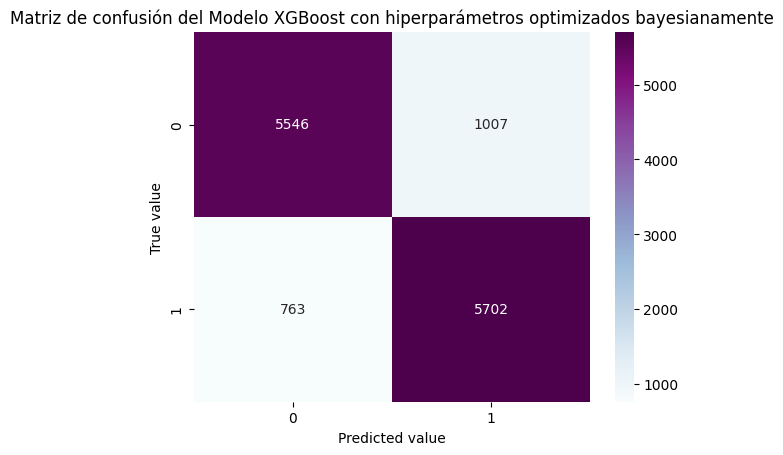

In [50]:
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary')))

confussionMatrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confussionMatrix,cmap='BuPu', annot=True, fmt='g')
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.title("Matriz de confusión del Modelo XGBoost con hiperparámetros optimizados bayesianamente")
plt.show()

Mostramos las distintas métricas

In [51]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {str(accuracy)}")
print(f"Recall: {str(recall)}")
print(f"Precision: {str(precision)}")
print(f"f1 score: {str(f1)}")

Accuracy: 0.8640344138884621
Recall: 0.8819798917246713
Precision: 0.8499031152183634
f1 score: 0.8656444511917414


In [52]:
filename = f'./best_xgboost_hyperparameters{runNumber}.txt'

with open(filename, 'w') as file:
    file.write("Mejor conjunto de hiperparámetros:\n")
    for param, value in hyperparameters.items():
        file.write(f"{param}: {value}\n")

    file.write(f"\nBest F1 Score: {bestScore}")

print(f"Mejor conjunto de hiperparámetros guardado en: '{filename}'")

Mejor conjunto de hiperparámetros guardado en: './best_xgboost_hyperparameters30.txt'


Realizamos las predicciones de los datos que vamos a submitear a kaggle

In [56]:
imputedAndFilteredTestEncoded = imputedAndFilteredTestEncoded.drop(["id", "is_canceled"], axis="columns")
y_pred = bestXgboost.predict(imputedAndFilteredTestEncoded)

Agrupamos en el dataframe el id que guardamos antes y los valores predichos

In [57]:
imputedAndFilteredTestEncoded["id"] = hotelsTestIds
imputedAndFilteredTestEncoded["is_canceled"] = y_pred

imputedAndFilteredTestEncoded.head(2)

total_of_special_requests  stays_in_weekend_nights  stays_in_week_nights  \
0                          0                        1                     2   
1                          0                        0                     4   

   reserved_room_type_P  reserved_room_type_H  reserved_room_type_G  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_F  reserved_room_type_E  reserved_room_type_D  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_C  ...  arrival_date_month_January  \
0                     0  ...                           0   
1                     0  ...                           0   

   arrival_date_month_February  arrival_date_month_December  \
0                            0                            0   
1                            0                            0   

   arrival_date_month_August  arrival_date_day_of_month      agent  adults  \
0                          0                          7  36.162958       2   
1                          0                         11  30.000000       2   

     adr                                    id  is_canceled  
0  100.0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1  
1  101.0  aba9aac2-4495-4645-a60e-90328713c999            1  

[2 rows x 211 columns]

Para exportar a Kaggle hacemos lo siguiente

In [58]:
exportResult = imputedAndFilteredTestEncoded.get(["id", "is_canceled"])
exportResult.shape

(26535, 2)

In [59]:
exportResult.head(2)

id  is_canceled
0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1
1  aba9aac2-4495-4645-a60e-90328713c999            1

El `runNumber` es sólo un número que ponemos para no pisar los submits

In [60]:
exportResult.to_csv(f"submit_{runNumber}_grupo16_gpwin_xgboost.csv", index=False)

Guardamos una serialización del modelo

In [61]:
filename = f'./xgboost_model_{runNumber}.joblib'
modelInfo = {'model': bestXgboost}

joblib.dump(modelInfo, filename)

['./xgboost_model_30.joblib']

### Modelo KNN

Probamos entrenar un modelo de K vecinos cercanos (K Nearest Neighbours - KNN) para el cual realizamos una optimización de hiperparámetros mediante una búsqueda aleatoria del conjunto de combinaciones, teniendo en cuenta un conjunto de valores de la cantidad de vecinos (n_neighbors), la forma de medir los pesos en relación a la distancia (weights), el algoritmo para computar cuáles son los vecinos (algorithm) y la forma de medir distancia (metric). El proceso lo realizamos optimizando la métrica F1 en un split de 5 folds del conjunto de train.

In [62]:
hotels_x = hotelsTree.drop(['is_canceled'], axis='columns', inplace=False)
hotels_y = hotelsTree['is_canceled'].copy()

x_train, x_test, y_train, y_test = train_test_split(hotels_x,
                                                    hotels_y,
                                                    test_size=0.3,
                                                    random_state=0)

In [66]:
runNumber = 31

parametersGrid = { 
                    'n_neighbors':range(2,20), 
                    'weights':['distance','uniform'],
                    'algorithm':['ball_tree', 'kd_tree', 'brute'],
                    'metric':['euclidean','manhattan','chebyshev']
                }

n = 400
folds = 5
kFoldCV = StratifiedKFold(n_splits = folds)
starterKnn = KNeighborsClassifier(n_jobs=-1)
scorerF1 = make_scorer(f1_score)

randomSearchCV = RandomizedSearchCV(estimator = starterKnn,
                                    param_distributions = parametersGrid,
                                    scoring = scorerF1,
                                    cv = kFoldCV,
                                    random_state=5,
                                    n_jobs = -1,
                                    n_iter=n,
                                    verbose=10)

randomSearchCV.fit(x_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=KNeighborsClassifier(n_jobs=-1), n_iter=400,
                   n_jobs=-1,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'metric': ['euclidean', 'manhattan',
                                                   'chebyshev'],
                                        'n_neighbors': range(2, 20),
                                        'weights': ['distance', 'uniform']},
                   random_state=5, scoring=make_scorer(f1_score), verbose=10)

Nos quedamos con el KNN con mejor set de hiperparámetros

In [68]:
bestKnn = randomSearchCV.best_estimator_

Obtenemos el score interno que sacó el mejor conjunto de hiperparámetros y el índice de splitting

In [69]:
bestScore = randomSearchCV.best_score_
indexOfBestFoldSplit = randomSearchCV.best_index_

print("Mejor F1 Score:", bestScore)
print("Fold Split Index para el mejor modelo:", indexOfBestFoldSplit)

Mejor F1 Score: 0.7694159711625252
Fold Split Index para el mejor modelo: 66


Mostramos y guardamos en un archivo de texto los hiperparámetros, junto con el score

In [70]:
hyperparameters = bestKnn.get_params()

print("Mejor conjunto de hiperparámetros:\n")
for param, value in hyperparameters.items():
    print(f"{param}: {value}")

Mejor conjunto de hiperparámetros:

algorithm: ball_tree
leaf_size: 30
metric: manhattan
metric_params: None
n_jobs: -1
n_neighbors: 17
p: 2
weights: distance


In [71]:
filename = f'./best_knn_hyperparameters{runNumber}.txt'

with open(filename, 'w') as file:
    file.write("Mejor conjunto de hiperparámetros:\n")
    for param, value in hyperparameters.items():
        file.write(f"{param}: {value}\n")

    file.write(f"\nBest F1 Score: {bestScore}")
    file.write(f"\nFold Split Index for Best Set: {indexOfBestFoldSplit}")

print(f"Mejor conjunto de hiperparámetros guardado en: '{filename}'")

Mejor conjunto de hiperparámetros guardado en: './best_knn_hyperparameters31.txt'


Lo fiteamos al conjunto de datos total de train

In [72]:
bestKnn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_jobs=-1,
                     n_neighbors=17, weights='distance')

In [73]:
y_pred = bestKnn.predict(x_test)

Imprimimos la matriz de confusión

F1-Score: 0.7709341545681184


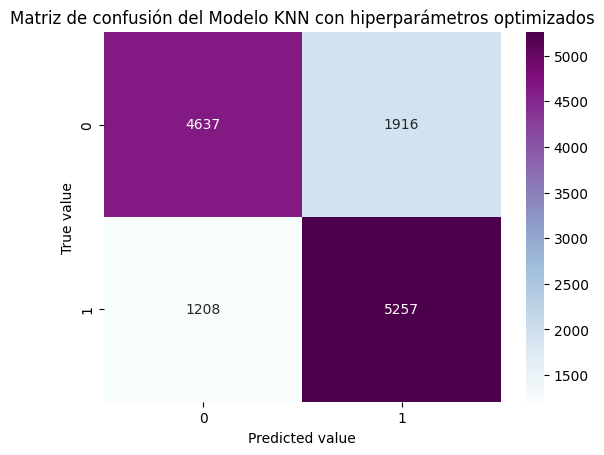

In [74]:
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary')))

confussionMatrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confussionMatrix,cmap='BuPu', annot=True, fmt='g')
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.title("Matriz de confusión del Modelo KNN con hiperparámetros optimizados")
plt.show()

Mostramos las distintas métricas

In [75]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {str(accuracy)}")
print(f"Recall: {str(recall)}")
print(f"Precision: {str(precision)}")
print(f"f1 score: {str(f1)}")

Accuracy: 0.7600245813489015
Recall: 0.8131477184841454
Precision: 0.7328872159486965
f1 score: 0.7709341545681184


Realizamos las predicciones de los datos que vamos a submitear a kaggle

In [76]:
imputedAndFilteredTestEncoded = imputedAndFilteredTestEncoded.drop(["id", "is_canceled"], axis="columns")
y_pred = bestKnn.predict(imputedAndFilteredTestEncoded)

Agrupamos en el dataframe el id que guardamos antes y los valores predichos

In [77]:
imputedAndFilteredTestEncoded["id"] = hotelsTestIds
imputedAndFilteredTestEncoded["is_canceled"] = y_pred

imputedAndFilteredTestEncoded.head(2)

total_of_special_requests  stays_in_weekend_nights  stays_in_week_nights  \
0                          0                        1                     2   
1                          0                        0                     4   

   reserved_room_type_P  reserved_room_type_H  reserved_room_type_G  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_F  reserved_room_type_E  reserved_room_type_D  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_C  ...  arrival_date_month_January  \
0                     0  ...                           0   
1                     0  ...                           0   

   arrival_date_month_February  arrival_date_month_December  \
0                            0                            0   
1                            0                            0   

   arrival_date_month_August  arrival_date_day_of_month      agent  adults  \
0                          0                          7  36.162958       2   
1                          0                         11  30.000000       2   

     adr                                    id  is_canceled  
0  100.0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1  
1  101.0  aba9aac2-4495-4645-a60e-90328713c999            1  

[2 rows x 211 columns]

Para exportar a Kaggle hacemos lo siguiente

In [78]:
exportResult = imputedAndFilteredTestEncoded.get(["id", "is_canceled"])
exportResult.shape

(26535, 2)

In [79]:
exportResult.head(2)

id  is_canceled
0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1
1  aba9aac2-4495-4645-a60e-90328713c999            1

El `runNumber` es sólo un número que ponemos para no pisar los submits

In [80]:
exportResult.to_csv(f"submit_{runNumber}_grupo16_gpwin_knn.csv", index=False)

Guardamos una serialización del modelo

In [81]:
filename = f'./knn_model_{runNumber}.joblib'
modelInfo = {'model': bestKnn}

joblib.dump(modelInfo, filename)

['./knn_model_31.joblib']

### Modelo RandomForest

Probamos utilizar un ensamble RandomForest. Hacemos el spliteo de data con relación 70-30

In [95]:
hotels_x = hotelsTreeWithoutTarget
hotels_y = hotelsTree["is_canceled"]

x_train, x_test, y_train, y_test = train_test_split(hotels_x,
                                                    hotels_y,
                                                    test_size=0.3,
                                                    random_state=2)

Optimizamos hiperparametros utilizando grid search pero para solo una metrica.

In [ ]:
runNumber = 32

parametersGrid = { 
                    "criterion" : ["gini", "entropy","log_loss"], 
                    "min_samples_leaf" : [1, 5, 10], 
                    "min_samples_split" : [2, 4, 10, 12, 16,32], 
                    "n_estimators": [1,10,20, 50,150,200,300]
                 }

baseRF = RandomForestClassifier(max_features=1000, oob_score=True, random_state=1, n_jobs=-1)

gridSearch = GridSearchCV(estimator=baseRF,
                              param_grid=parametersGrid,
                              scoring="f1",
                              cv=5,
                              n_jobs=-1,
                              verbose=0)

gridSearchModel = gridSearch.fit(X = x_train, y = y_train)

Guardamos el mejor modelo y sus parametros optimizados para el random forest

In [97]:
bestRF = gridSearch.best_estimator_

Obtenemos el score interno que sacó el mejor conjunto de hiperparámetros y el índice de splitting

In [98]:
hyperparameters = gridSearch.best_params_
bestScore = gridSearch.best_score_

print("Mejor F1 Score:", bestScore)

Mejor F1 Score: 0.8606126229479575
Fold Split Index para el mejor modelo: 0


Mostramos y guardamos en un archivo de texto los hiperparámetros, junto con el score

In [118]:
hyperparameters = bestRF.get_params()

print("Mejor conjunto de hiperparámetros:\n")
for param, value in hyperparameters.items():
    print(f"{param}: {value}")

Mejor conjunto de hiperparámetros:

bootstrap: True
ccp_alpha: 0.0
class_weight: None
criterion: gini
max_depth: None
max_features: 1000
max_leaf_nodes: None
max_samples: None
min_impurity_decrease: 0.0
min_samples_leaf: 1
min_samples_split: 4
min_weight_fraction_leaf: 0.0
n_estimators: 150
n_jobs: -1
oob_score: True
random_state: 1
verbose: 0
warm_start: False


Lo fiteamos al conjunto de datos total de train

In [119]:
bestRF.fit(x_train, y_train)

RandomForestClassifier(max_features=1000, min_samples_split=4, n_estimators=150,
                       n_jobs=-1, oob_score=True, random_state=1)

In [120]:
y_pred = bestRF.predict(x_test)

Imprimimos la matriz de confusión

F1-Score: 0.8647470115028945


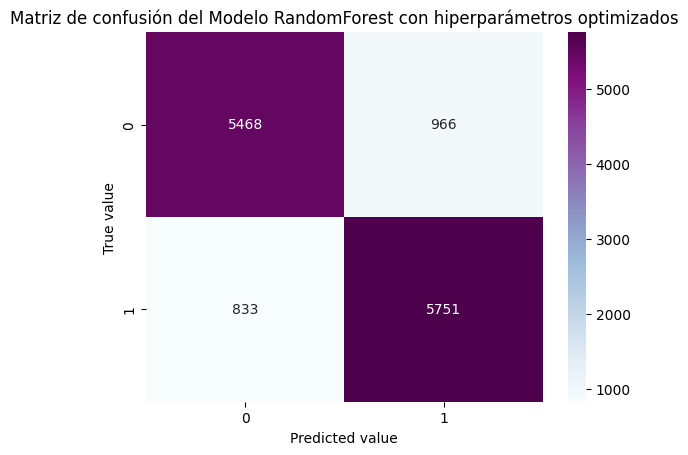

In [121]:
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary')))

confussionMatrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confussionMatrix,cmap='BuPu', annot=True, fmt='g')
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.title("Matriz de confusión del Modelo RandomForest con hiperparámetros optimizados")
plt.show()

Mostramos las distintas métricas

In [122]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {str(accuracy)}")
print(f"Recall: {str(recall)}")
print(f"Precision: {str(precision)}")
print(f"f1 score: {str(f1)}")

Accuracy: 0.8618067291442618
Recall: 0.8734811664641555
Precision: 0.8561857972309067
f1 score: 0.8647470115028945


Realizamos las predicciones de los datos que vamos a submitear a kaggle

In [123]:
imputedAndFilteredTestEncoded = imputedAndFilteredTestEncoded.drop(["id", "is_canceled"], axis="columns")
y_pred = bestRF.predict(imputedAndFilteredTestEncoded)

Agrupamos en el dataframe el id que guardamos antes y los valores predichos

In [124]:
imputedAndFilteredTestEncoded["id"] = hotelsTestIds
imputedAndFilteredTestEncoded["is_canceled"] = y_pred

imputedAndFilteredTestEncoded.head(2)

total_of_special_requests  stays_in_weekend_nights  stays_in_week_nights  \
0                          0                        1                     2   
1                          0                        0                     4   

   reserved_room_type_P  reserved_room_type_H  reserved_room_type_G  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_F  reserved_room_type_E  reserved_room_type_D  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_C  ...  arrival_date_month_January  \
0                     0  ...                           0   
1                     0  ...                           0   

   arrival_date_month_February  arrival_date_month_December  \
0                            0                            0   
1                            0                            0   

   arrival_date_month_August  arrival_date_day_of_month      agent  adults  \
0                          0                          7  36.162958       2   
1                          0                         11  30.000000       2   

     adr                                    id  is_canceled  
0  100.0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1  
1  101.0  aba9aac2-4495-4645-a60e-90328713c999            1  

[2 rows x 211 columns]

Para exportar a Kaggle hacemos lo siguiente

In [125]:
exportResult = imputedAndFilteredTestEncoded.get(["id", "is_canceled"])
exportResult.shape

(26535, 2)

In [126]:
exportResult.head(2)

id  is_canceled
0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1
1  aba9aac2-4495-4645-a60e-90328713c999            1

El `runNumber` es sólo un número que ponemos para no pisar los submits

In [127]:
exportResult.to_csv(f"submit_{runNumber}_grupo16_gpwin_rf.csv", index=False)

Guardamos una serialización del modelo

In [128]:
filename = f'./rf_model_{runNumber}.joblib'
modelInfo = {'model': bestRF}

joblib.dump(modelInfo, filename)

['./rf_model_32.joblib']

Hacemos una representación gráfica de 50 árboles estimadores del random forest. No aporta un valor de entendimiento del mismo debido a su tamaño y a la cantidad de árboles que hay, pero los mostramos para dar una idea visual de la estructura del mismo

In [129]:
plt.figure(figsize=(100,100))

tree_plot_completo = tree.plot_tree(bestRF.estimators_[50],
                                 feature_names=hotels_x.columns.to_list(),
                                 filled=True,
                                 rounded=True,
                                 class_names=['Not Canceled','Canceled'])
plt.show(tree_plot_completo)

### Modelos de Ensamble híbridos

#### Preparación de modelos para armar los ensambles

Obtenemos los modelos serializados con joblib a lo largo del notebook, de esta manera alcanza con tener los archivos localmente y no hace falta correr todo el notebook de nuevo, teniendo en cuenta los largos tiempos de entrenamiento

Los modelos que usaremos en los ensambles serán un SVM, un XGBoost, un KNN y un RandomForest, cada uno con el mejor set de hiperparámetros que logramos conseguir para el modelo respectivo

In [29]:
filenameSVM = './svm_model_25.joblib'
filenameXGBoost = './xgboost_model_30.joblib'
filenameKNN = './knn_model_31.joblib'
filenameRandomForest = './rf_model_32.joblib'

modelInfoSVM =joblib.load(filenameSVM)
bestSVMModel = modelInfoSVM['model']

modelInfoXGBoost =joblib.load(filenameXGBoost)
bestXGBoostModel = modelInfoXGBoost['model']

modelInfoKNN =joblib.load(filenameKNN)
bestKNNModel = modelInfoKNN['model']

modelInfoRandomForest =joblib.load(filenameRandomForest)
bestRFModel = modelInfoRandomForest['model']

#### Ensamble con Voting con los 4 modelos

Hacemos la división de los datos de train con proporción 70-30

In [66]:
hotels_x = hotelsTree.drop(['is_canceled'], axis='columns', inplace=False)
hotels_y = hotelsTree['is_canceled'].copy()

x_train, x_test, y_train, y_test = train_test_split(hotels_x,
                                                    hotels_y,
                                                    test_size=0.3,
                                                    random_state=0)

Con los 4 modelos armamos el ensamble de voting

In [64]:
runNumber = 33

estimators = [
    ("xgboost", bestXGBoostModel),
    ("randomForest", bestRFModel),
    ("svm", bestSVMModel),
    ("knn", bestKNNModel),
]

votingEnsamble = VotingClassifier(estimators = estimators, voting = 'hard', n_jobs=-1)

Fiteamos el ensamble con los datos totales de train

In [65]:
votingEnsamble.fit(x_train, y_train)

VotingClassifier(estimators=[('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.6154215811986666,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eta=0.04672708916593231,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=0.0006187420422423777,
                                            grow_policy=None,
                                            im...
                                            n_estimators=481, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('randomForest',
                              RandomForestClassifier(max_features=1000,
                                                     min_samples_split=4,
                                                     n_estimators=150,
                                                     n_jobs=-1, oob_score=True,
                                                     random_state=1)),
                             ('svm',
                              SVC(C=6, coef0=0, gamma=0.01, random_state=0)),
                             ('knn',
                              KNeighborsClassifier(algorithm='ball_tree',
                                                   metric='manhattan',
                                                   n_jobs=-1, n_neighbors=17,
                                                   weights='distance'))],
                 n_jobs=-1)

In [66]:
y_pred = votingEnsamble.predict(x_test)

Mostramos la matriz de confusión

F1-Score: 0.8322256443507863


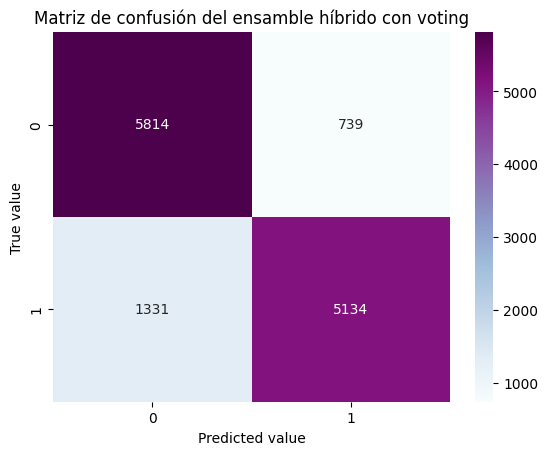

In [67]:
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary')))

confussionMatrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confussionMatrix,cmap='BuPu', annot=True, fmt='g')
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.title("Matriz de confusión del ensamble híbrido con voting")
plt.show()

Mostramos las distintas métricas

In [68]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {str(accuracy)}")
print(f"Recall: {str(recall)}")
print(f"Precision: {str(precision)}")
print(f"f1 score: {str(f1)}")

Accuracy: 0.8409893992932862
Recall: 0.794122196442382
Precision: 0.8741699301890005
f1 score: 0.8322256443507863


Realizamos las predicciones de los datos que vamos a submitear a kaggle

In [69]:
imputedAndFilteredTestEncoded = imputedAndFilteredTestEncoded.drop(["id", "is_canceled"], axis="columns")
y_pred = votingEnsamble.predict(imputedAndFilteredTestEncoded)

Agrupamos en el dataframe el id que guardamos antes y los valores predichos

In [70]:
imputedAndFilteredTestEncoded["id"] = hotelsTestIds
imputedAndFilteredTestEncoded["is_canceled"] = y_pred

imputedAndFilteredTestEncoded.head(2)

total_of_special_requests  stays_in_weekend_nights  stays_in_week_nights  \
0                          0                        1                     2   
1                          0                        0                     4   

   reserved_room_type_P  reserved_room_type_H  reserved_room_type_G  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_F  reserved_room_type_E  reserved_room_type_D  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_C  ...  arrival_date_month_January  \
0                     0  ...                           0   
1                     0  ...                           0   

   arrival_date_month_February  arrival_date_month_December  \
0                            0                            0   
1                            0                            0   

   arrival_date_month_August  arrival_date_day_of_month      agent  adults  \
0                          0                          7  36.162958       2   
1                          0                         11  30.000000       2   

     adr                                    id  is_canceled  
0  100.0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1  
1  101.0  aba9aac2-4495-4645-a60e-90328713c999            1  

[2 rows x 211 columns]

Para exportar a Kaggle hacemos lo siguiente

In [71]:
exportResult = imputedAndFilteredTestEncoded.get(["id", "is_canceled"])
exportResult.shape

(26535, 2)

In [72]:
exportResult.head(2)

id  is_canceled
0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1
1  aba9aac2-4495-4645-a60e-90328713c999            1

El `runNumber` es sólo un número que ponemos para no pisar los submits

In [73]:
exportResult.to_csv(f"submit_{runNumber}_grupo16_gpwin_voting_ensamble.csv", index=False)

Guardamos una serialización del modelo

In [74]:
filename = f'./voting_ensamble_model_{runNumber}.joblib'
modelInfo = {'model': votingEnsamble}

joblib.dump(modelInfo, filename)

['./voting_ensamble_model_33.joblib']

#### Ensamble con Voting con RandomForest y XGBoost

Hacemos la división de los datos de train con proporción 70-30

In [122]:
hotels_x = hotelsTree.drop(['is_canceled'], axis='columns', inplace=False)
hotels_y = hotelsTree['is_canceled'].copy()

x_train, x_test, y_train, y_test = train_test_split(hotels_x,
                                                    hotels_y,
                                                    test_size=0.3,
                                                    random_state=0)

Con los modelos RandomForest y XGBoost armamos el ensamble de voting, utilizamos el parámetro soft por lo cual hará la predicción tomando el argmax de la suma de las probabilidades de los modelos individuales

In [123]:
runNumber = 35

estimators = [
    ("xgboost", bestXGBoostModel),
    ("randomForest", bestRFModel),
]

votingEnsamble = VotingClassifier(estimators = estimators, voting = 'soft', n_jobs=-1)

Fiteamos el ensamble con los datos totales de train

In [124]:
votingEnsamble.fit(x_train, y_train)

VotingClassifier(estimators=[('xgboost',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.6154215811986666,
                                            device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eta=0.04672708916593231,
                                            eval_metric=None,
                                            feature_types=None,
                                            gamma=0.0006187420422423777,
                                            grow_policy=None,
                                            im...
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=9,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=481, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('randomForest',
                              RandomForestClassifier(max_features=1000,
                                                     min_samples_split=4,
                                                     n_estimators=150,
                                                     n_jobs=-1, oob_score=True,
                                                     random_state=1))],
                 n_jobs=-1, voting='soft')

In [125]:
y_pred = votingEnsamble.predict(x_test)

Mostramos la matriz de confusión

F1-Score: 0.8694330445356437


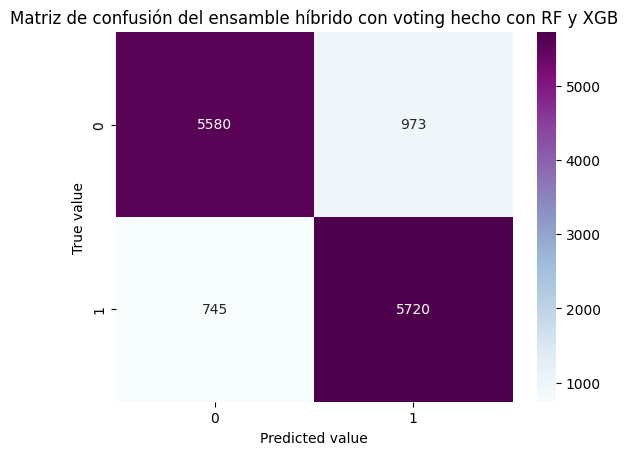

In [126]:
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary')))

confussionMatrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confussionMatrix,cmap='BuPu', annot=True, fmt='g')
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.title("Matriz de confusión del ensamble híbrido con voting hecho con RF y XGB")
plt.show()

Mostramos las distintas métricas

In [85]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {str(accuracy)}")
print(f"Recall: {str(recall)}")
print(f"Precision: {str(precision)}")
print(f"f1 score: {str(f1)}")

Accuracy: 0.8680288830849593
Recall: 0.8847641144624904
Precision: 0.8546242342746153
f1 score: 0.8694330445356437


Observamos que utilizando en el ensamble sólo el modelo de random forest y el xgboost (que fueron los modelos que mejor performaron a lo largo del notebook) y además el parámetro soft, obtenemos mejor performance que utilizando los 4

Realizamos las predicciones de los datos que vamos a submitear a kaggle

In [86]:
imputedAndFilteredTestEncoded = imputedAndFilteredTestEncoded.drop(["id", "is_canceled"], axis="columns")
y_pred = votingEnsamble.predict(imputedAndFilteredTestEncoded)

Agrupamos en el dataframe el id que guardamos antes y los valores predichos

In [87]:
imputedAndFilteredTestEncoded["id"] = hotelsTestIds
imputedAndFilteredTestEncoded["is_canceled"] = y_pred

imputedAndFilteredTestEncoded.head(2)

total_of_special_requests  stays_in_weekend_nights  stays_in_week_nights  \
0                          0                        1                     2   
1                          0                        0                     4   

   reserved_room_type_P  reserved_room_type_H  reserved_room_type_G  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_F  reserved_room_type_E  reserved_room_type_D  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_C  ...  arrival_date_month_January  \
0                     0  ...                           0   
1                     0  ...                           0   

   arrival_date_month_February  arrival_date_month_December  \
0                            0                            0   
1                            0                            0   

   arrival_date_month_August  arrival_date_day_of_month      agent  adults  \
0                          0                          7  36.162958       2   
1                          0                         11  30.000000       2   

     adr                                    id  is_canceled  
0  100.0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1  
1  101.0  aba9aac2-4495-4645-a60e-90328713c999            1  

[2 rows x 211 columns]

Para exportar a Kaggle hacemos lo siguiente

In [88]:
exportResult = imputedAndFilteredTestEncoded.get(["id", "is_canceled"])
exportResult.shape

(26535, 2)

In [89]:
exportResult.head(2)

id  is_canceled
0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1
1  aba9aac2-4495-4645-a60e-90328713c999            1

El `runNumber` es sólo un número que ponemos para no pisar los submits

In [90]:
exportResult.to_csv(f"submit_{runNumber}_grupo16_gpwin_voting_ensamble.csv", index=False)

Guardamos una serialización del modelo

In [91]:
filename = f'./voting_ensamble_model_{runNumber}.joblib'
modelInfo = {'model': votingEnsamble}

joblib.dump(modelInfo, filename)

['./voting_ensamble_model_35.joblib']

#### Ensamble con Stacking con los 4 modelos

Hacemos la división de los datos de train con proporción 70-30

In [75]:
hotels_x = hotelsTree.drop(['is_canceled'], axis='columns', inplace=False)
hotels_y = hotelsTree['is_canceled'].copy()

x_train, x_test, y_train, y_test = train_test_split(hotels_x,
                                                    hotels_y,
                                                    test_size=0.3,
                                                    random_state=0)

Con los 4 modelos armamos el ensamble de stacking

In [76]:
runNumber = 34

estimators = [
    ("xgboost", bestXGBoostModel),
    ("randomForest", bestRFModel),
    ("svm", bestSVMModel),
    ("knn", bestKNNModel),
]

metaModel = LogisticRegressionCV()

stackingEnsamble = StackingClassifier(estimators = estimators, final_estimator=metaModel, passthrough = True, cv=5, n_jobs=-1)

Fiteamos el ensamble con los datos totales de train

In [77]:
stackingEnsamble.fit(x_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.6154215811986666,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eta=0.04672708916593231,
                                              eval_metric=None,
                                              feature_types=None,
                                              gamma=0.0006187420422423777,
                                              grow_policy=...
                                RandomForestClassifier(max_features=1000,
                                                       min_samples_split=4,
                                                       n_estimators=150,
                                                       n_jobs=-1,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('svm',
                                SVC(C=6, coef0=0, gamma=0.01, random_state=0)),
                               ('knn',
                                KNeighborsClassifier(algorithm='ball_tree',
                                                     metric='manhattan',
                                                     n_jobs=-1, n_neighbors=17,
                                                     weights='distance'))],
                   final_estimator=LogisticRegressionCV(), n_jobs=-1,
                   passthrough=True)

In [78]:
y_pred = stackingEnsamble.predict(x_test)

Mostramos la matriz de confusión

F1-Score: 0.8691931540342298


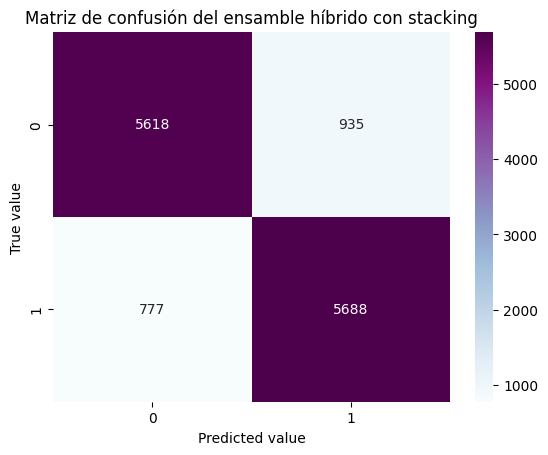

In [79]:
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary')))

confussionMatrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confussionMatrix,cmap='BuPu', annot=True, fmt='g')
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.title("Matriz de confusión del ensamble híbrido con stacking")
plt.show()

Mostramos las distintas métricas

In [80]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {str(accuracy)}")
print(f"Recall: {str(recall)}")
print(f"Precision: {str(precision)}")
print(f"f1 score: {str(f1)}")

Accuracy: 0.8684897833768628
Recall: 0.8798143851508121
Precision: 0.85882530575268
f1 score: 0.8691931540342298


Realizamos las predicciones de los datos que vamos a submitear a kaggle

In [81]:
imputedAndFilteredTestEncoded = imputedAndFilteredTestEncoded.drop(["id", "is_canceled"], axis="columns")
y_pred = stackingEnsamble.predict(imputedAndFilteredTestEncoded)

Agrupamos en el dataframe el id que guardamos antes y los valores predichos

In [82]:
imputedAndFilteredTestEncoded["id"] = hotelsTestIds
imputedAndFilteredTestEncoded["is_canceled"] = y_pred

imputedAndFilteredTestEncoded.head(2)

total_of_special_requests  stays_in_weekend_nights  stays_in_week_nights  \
0                          0                        1                     2   
1                          0                        0                     4   

   reserved_room_type_P  reserved_room_type_H  reserved_room_type_G  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_F  reserved_room_type_E  reserved_room_type_D  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_C  ...  arrival_date_month_January  \
0                     0  ...                           0   
1                     0  ...                           0   

   arrival_date_month_February  arrival_date_month_December  \
0                            0                            0   
1                            0                            0   

   arrival_date_month_August  arrival_date_day_of_month      agent  adults  \
0                          0                          7  36.162958       2   
1                          0                         11  30.000000       2   

     adr                                    id  is_canceled  
0  100.0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1  
1  101.0  aba9aac2-4495-4645-a60e-90328713c999            1  

[2 rows x 211 columns]

Para exportar a Kaggle hacemos lo siguiente

In [83]:
exportResult = imputedAndFilteredTestEncoded.get(["id", "is_canceled"])
exportResult.shape

(26535, 2)

In [84]:
exportResult.head(2)

id  is_canceled
0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1
1  aba9aac2-4495-4645-a60e-90328713c999            1

El `runNumber` es sólo un número que ponemos para no pisar los submits

In [85]:
exportResult.to_csv(f"submit_{runNumber}_grupo16_gpwin_stacking_ensamble.csv", index=False)

Guardamos una serialización del modelo

In [86]:
filename = f'./stacking_ensamble_model_{runNumber}.joblib'
modelInfo = {'model': stackingEnsamble}

joblib.dump(modelInfo, filename)

['./stacking_ensamble_model_34.joblib']

#### Ensamble con Stacking con RandomForest y XGBoost

Hacemos la división de los datos de train con proporción 70-30

In [116]:
hotels_x = hotelsTree.drop(['is_canceled'], axis='columns', inplace=False)
hotels_y = hotelsTree['is_canceled'].copy()

x_train, x_test, y_train, y_test = train_test_split(hotels_x,
                                                    hotels_y,
                                                    test_size=0.3,
                                                    random_state=0)

Con los modelos RandomForest y XGBoost armamos el ensamble de stacking

In [127]:
runNumber = 36

estimators = [
    ("xgboost", bestXGBoostModel),
    ("randomForest", bestRFModel)
]

metaModel = LogisticRegressionCV()

stackingEnsamble = StackingClassifier(estimators = estimators, final_estimator=metaModel, passthrough = False, cv=5, n_jobs=-1)

Fiteamos el ensamble con los datos totales de train

In [128]:
stackingEnsamble.fit(x_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.6154215811986666,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eta=0.04672708916593231,
                                              eval_metric=None,
                                              feature_types=None,
                                              gamma=0.0006187420422423777,
                                              grow_policy=...
                                              max_delta_step=None, max_depth=9,
                                              max_leaves=None,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=481, n_jobs=None,
                                              num_parallel_tree=None, ...)),
                               ('randomForest',
                                RandomForestClassifier(max_features=1000,
                                                       min_samples_split=4,
                                                       n_estimators=150,
                                                       n_jobs=-1,
                                                       oob_score=True,
                                                       random_state=1))],
                   final_estimator=LogisticRegressionCV(), n_jobs=-1)

In [129]:
y_pred = stackingEnsamble.predict(x_test)

Mostramos la matriz de confusión

F1-Score: 0.8688749809189437


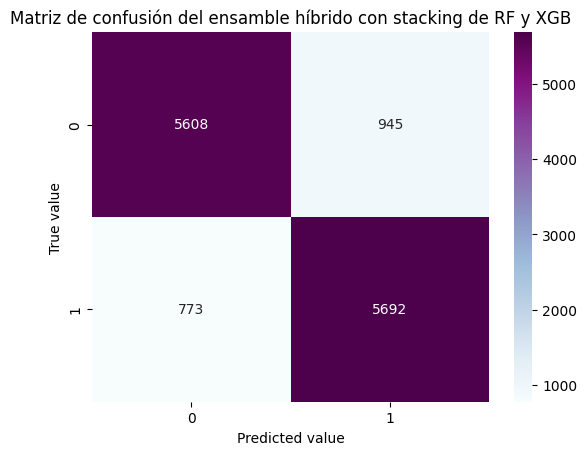

In [130]:
print('F1-Score: {}'.format(f1_score(y_test, y_pred, average='binary')))

confussionMatrix = confusion_matrix(y_test,y_pred)
sns.heatmap(confussionMatrix,cmap='BuPu', annot=True, fmt='g')
plt.xlabel('Predicted value')
plt.ylabel('True value')
plt.title("Matriz de confusión del ensamble híbrido con stacking de RF y XGB")
plt.show()

Mostramos las distintas métricas

In [132]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

print(f"Accuracy: {str(accuracy)}")
print(f"Recall: {str(recall)}")
print(f"Precision: {str(precision)}")
print(f"f1 score: {str(f1)}")

Accuracy: 0.8680288830849593
Recall: 0.8804331013147718
Precision: 0.8576163929486214
f1 score: 0.8688749809189437


Realizamos las predicciones de los datos que vamos a submitear a kaggle

In [133]:
imputedAndFilteredTestEncoded = imputedAndFilteredTestEncoded.drop(["id", "is_canceled"], axis="columns")
y_pred = stackingEnsamble.predict(imputedAndFilteredTestEncoded)

Agrupamos en el dataframe el id que guardamos antes y los valores predichos

In [134]:
imputedAndFilteredTestEncoded["id"] = hotelsTestIds
imputedAndFilteredTestEncoded["is_canceled"] = y_pred

imputedAndFilteredTestEncoded.head(2)

total_of_special_requests  stays_in_weekend_nights  stays_in_week_nights  \
0                          0                        1                     2   
1                          0                        0                     4   

   reserved_room_type_P  reserved_room_type_H  reserved_room_type_G  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_F  reserved_room_type_E  reserved_room_type_D  \
0                     0                     0                     0   
1                     0                     0                     0   

   reserved_room_type_C  ...  arrival_date_month_January  \
0                     0  ...                           0   
1                     0  ...                           0   

   arrival_date_month_February  arrival_date_month_December  \
0                            0                            0   
1                            0                            0   

   arrival_date_month_August  arrival_date_day_of_month      agent  adults  \
0                          0                          7  36.162958       2   
1                          0                         11  30.000000       2   

     adr                                    id  is_canceled  
0  100.0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1  
1  101.0  aba9aac2-4495-4645-a60e-90328713c999            1  

[2 rows x 211 columns]

Para exportar a Kaggle hacemos lo siguiente

In [135]:
exportResult = imputedAndFilteredTestEncoded.get(["id", "is_canceled"])
exportResult.shape

(26535, 2)

In [136]:
exportResult.head(2)

id  is_canceled
0  e6d0d58a-ab96-44d3-b28f-85df1cc15f1e            1
1  aba9aac2-4495-4645-a60e-90328713c999            1

El `runNumber` es sólo un número que ponemos para no pisar los submits

In [137]:
exportResult.to_csv(f"submit_{runNumber}_grupo16_gpwin_stacking_ensamble.csv", index=False)

Guardamos una serialización del modelo

In [138]:
filename = f'./stacking_ensamble_model_{runNumber}.joblib'
modelInfo = {'model': stackingEnsamble}

joblib.dump(modelInfo, filename)

['./stacking_ensamble_model_36.joblib']